# Breath of the Wild

In [111]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt
import csv

In [112]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [113]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [114]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Get equipment list

In [115]:
# # create loop to get equipment data store to list.
# for i in equipment_json:
#     # create a dictionary for equipment to create DataFrame
#     equipment_dict = {
#         "name": i['name'],
#         "attack": i['attack'],
#         "defense": i['defense']
#     }
#     # add dictionary to list.
#     equip_list.append(equipment_dict)

In [116]:
# # Create DataFrame and save to .csv file
# equipment_df = pd.DataFrame(equip_list).sort_values(by="name")
# equipment_df.to_csv("BotW_equip_stats.csv", index=False)

# Monsters

In [117]:
# get foods and add to list
for i in monsters_json:
    
    # create a dictionary for monsters to create dataframe)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    
    # add dictionary to list
    monsters.append(monster_dict)

In [118]:
# create dataframe
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")

# sort alphabetically
monsters_df = monsters_df.drop_duplicates(subset=['id'], keep='first')

# set index
monsters_df = monsters_df.set_index("id")

# display dataframe
monsters_df

,name
id,
105,black bokoblin
149,black hinox
115,black lizalfos
110,black moblin
101,blizzrobe
...,...
161,waterblight ganon
123,white-maned lynel
162,windblight ganon


# Drops

In [119]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)

# transform each element into its own row in dataframe
drops_df = drops_df.explode('drops')

# display dataframe
#drops_df

In [120]:
# clean data by dropping Nan
drops_df = drops_df.dropna()
drops_df

,drops,id
0,moblin horn,108
0,moblin fang,108
1,moblin horn,109
1,moblin fang,109
1,moblin guts,109
...,...,...
79,ancient gear,129
79,ancient shaft,129
80,octorok tentacle,92
80,octo balloon,92


In [121]:
# groupby ID and count number of drops each monster has
drops_df = drops_df.groupby(['id'])['drops'].count()

# add it to dataframe
drops_df = pd.DataFrame(drops_df)

# display dataframe
drops_df

,drops
id,
84,2
85,1
86,1
87,1
88,4
89,2
90,2
91,2
92,3


In [122]:
# reset index for drops_df and monsters_df and merge the two dataframes
drops_df = drops_df.reset_index()
monsters_df = monsters_df.reset_index()

# merge drops_df and monsters_df dataframes
monsters_merged_df = pd.merge(monsters_df, drops_df, how="outer", on="id")
monsters_merged_df

,id,name,drops
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,6.0
4,101,blizzrobe,NaN
...,...,...,...
76,161,waterblight ganon,NaN
77,123,white-maned lynel,3.0
78,162,windblight ganon,NaN
79,135,yiga blademaster,6.0


In [123]:
# clean data by dropping Nan
monsters_merged_df = monsters_merged_df.dropna()
#monsters_merged_df

In [124]:
# rename columns
monsters_merged_df.columns = ["ID", "Monster Name", "Drop Count"]
monsters_merged_df

,ID,Monster Name,Drop Count
0,105,black bokoblin,3.0
1,149,black hinox,9.0
2,115,black lizalfos,3.0
3,110,black moblin,6.0
5,104,blue bokoblin,3.0
6,148,blue hinox,24.0
7,114,blue lizalfos,3.0
8,109,blue moblin,6.0
9,122,blue-maned lynel,3.0
10,103,bokoblin,2.0


In [125]:
# create new column for species in the monsters_merged_df dataframe
monsters_merged_df["Species"] = ""
monsters_merged_df

<ipython-input-125-b400f8667a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"] = ""


,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,
1,149,black hinox,9.0,
2,115,black lizalfos,3.0,
3,110,black moblin,6.0,
5,104,blue bokoblin,3.0,
6,148,blue hinox,24.0,
7,114,blue lizalfos,3.0,
8,109,blue moblin,6.0,
9,122,blue-maned lynel,3.0,
10,103,bokoblin,2.0,


In [126]:
# update dataframe by adding Species to each monster
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("nox")] = "hinox"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lizalfos")] = "lizalfos"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moblin")] = "moblin"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("lynel")] = "lynel"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("chuchu")] = "chuchu"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("keese")] = "keese"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("robe")] = "wizzrobe"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("talus")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("octorok")] = "octorok"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("ganon")] = "ganon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("pebblit")] = "talus"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("master kohga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("yiga")] = "yiga clan"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koshia")] = "sheikah"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("dinraal")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("naydra")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("farosh")] = "dragon"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("guardian")] = "guardian scout"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("moldu")] = "moldugas"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("sentry")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("stalker")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("skywatcher")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("turret")] = "guardian"
monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("decayed")] = "guardian"
monsters_merged_df

<ipython-input-126-3673f7a57955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_df["Species"][monsters_merged_df["Monster Name"].str.contains("koblin")] = "bokoblin"
C:\Users\Ronca\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-126-3673f7a57955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsters_merged_d

,ID,Monster Name,Drop Count,Species
0,105,black bokoblin,3.0,bokoblin
1,149,black hinox,9.0,hinox
2,115,black lizalfos,3.0,lizalfos
3,110,black moblin,6.0,moblin
5,104,blue bokoblin,3.0,bokoblin
6,148,blue hinox,24.0,hinox
7,114,blue lizalfos,3.0,lizalfos
8,109,blue moblin,6.0,moblin
9,122,blue-maned lynel,3.0,lynel
10,103,bokoblin,2.0,bokoblin


In [127]:
# clean dataframe by reordering columns
monsters_merged_df = monsters_merged_df[["ID", "Species", "Monster Name", "Drop Count"]]
monsters_merged_df

,ID,Species,Monster Name,Drop Count
0,105,bokoblin,black bokoblin,3.0
1,149,hinox,black hinox,9.0
2,115,lizalfos,black lizalfos,3.0
3,110,moblin,black moblin,6.0
5,104,bokoblin,blue bokoblin,3.0
6,148,hinox,blue hinox,24.0
7,114,lizalfos,blue lizalfos,3.0
8,109,moblin,blue moblin,6.0
9,122,lynel,blue-maned lynel,3.0
10,103,bokoblin,bokoblin,2.0


In [128]:
# format dataframe by capitalizing the first letter in each word
monsters_merged_df["Species"]= monsters_merged_df["Species"].str.title()
monsters_merged_df["Monster Name"]= monsters_merged_df["Monster Name"].str.title()

In [129]:
# sort by species and ID
monsters_merged_df = monsters_merged_df.sort_values(by=["Species", "ID"], ascending=True)
# Save new DataFrame to csv file
monsters_merged_df.to_csv("BotW_Monsters.csv", index=False)
monsters_merged_df

,ID,Species,Monster Name,Drop Count
10,103,Bokoblin,Bokoblin,2.0
5,104,Bokoblin,Blue Bokoblin,3.0
0,105,Bokoblin,Black Bokoblin,3.0
65,106,Bokoblin,Stalkoblin,2.0
59,107,Bokoblin,Silver Bokoblin,9.0
12,84,Chuchu,Chuchu,2.0
24,85,Chuchu,Fire Chuchu,1.0
40,86,Chuchu,Ice Chuchu,1.0
19,87,Chuchu,Electric Chuchu,1.0
37,125,Guardian,Guardian Stalker,24.0


## Monster Observation

In [130]:
# analyze mode by monster to determine frequency
monster_quantity = monsters_merged_df.groupby(['Species'])["Monster Name"].count()
monsters_quantity_df = pd.DataFrame(monster_quantity).sort_values(by=["Monster Name"], ascending=False)
monsters_quantity_df = monsters_quantity_df.reset_index()

#rename columns
monsters_quantity_df.columns = ["Species", "Quantity"]

#display
monsters_quantity_df

,Species,Quantity
0,Lizalfos,8
1,Talus,8
2,Bokoblin,5
3,Guardian,5
4,Moblin,5
5,Octorok,5
6,Chuchu,4
7,Guardian Scout,4
8,Hinox,4
9,Keese,4


In [131]:
# analyze drop count by species
species_drop_sum = monsters_merged_df.groupby(['Species'])['Drop Count'].sum()
species_df = pd.DataFrame(species_drop_sum).sort_values(by=["Drop Count"], ascending=False)
species_df.reset_index()

# display
species_df

,Drop Count
Species,
Talus,56.0
Guardian,45.0
Hinox,44.0
Moblin,36.0
Lizalfos,28.0
Octorok,26.0
Bokoblin,19.0
Lynel,17.0
Guardian Scout,16.0


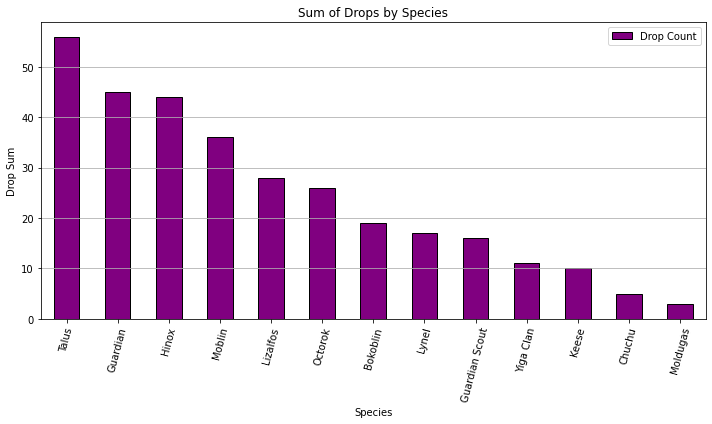

In [135]:
# plot bar chart of species and sum of drops
fig, ax = plt.subplots()
species_df.plot(kind="bar", figsize=(10,6), ax=ax, color="purple", edgecolor="black",
                  title="Sum of Drops by Species",
                  xlabel="Species",
                  ylabel="Drop Sum");
plt.xticks(rotation = 75)
ax.yaxis.grid()
fig.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Species.png")

Monster Species Analysis
* The chart above shows us the sum of drops by each species of monster
* Rounding out the top 3 is the Talus with 34, Hinox with 32 and Lizalfos with 28
* These species of monsters in general will produce more drops, therefore, fighting any of the monsters within that species will yield a higher reward
* As the sum for each species increase, you will need to defeat less of these monsters if you are looking to add to your inventory
* As the sum for each species decrease, you will need to defeat more of these monsters if you are looking to add to your inventory

In [136]:
# analyze drop count by name
monster_drop_count = monsters_merged_df.groupby(['Monster Name'])["Drop Count"].sum()
monster_drop_count_df = pd.DataFrame(monster_drop_count).sort_values(by=["Drop Count"], ascending=False)
monster_drop_count_df.reset_index()

# display
monster_drop_count_df.head(10)

,Drop Count
Monster Name,
Guardian Stalker,24.0
Blue Hinox,24.0
Silver Moblin,18.0
Stone Talus,16.0
Stone Talus (Rare),14.0
Hinox,10.0
Silver Bokoblin,9.0
Silver Lizalfos,9.0
Black Hinox,9.0


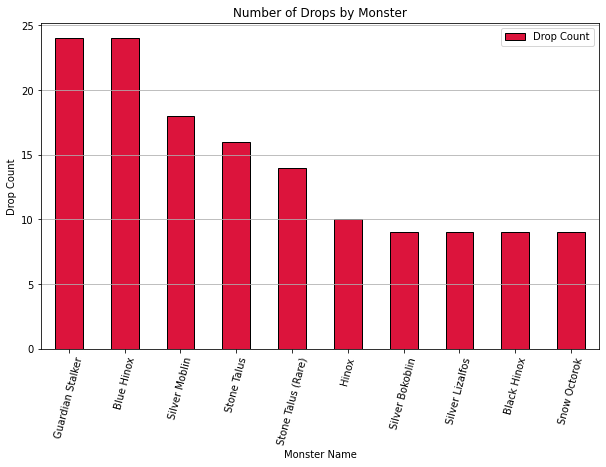

In [137]:
# plot bar chart of top 10 monster by drop total
fig1, ax1 = plt.subplots()
monster_drop_count_df.head(10).plot(kind="bar", figsize=(10,6), ax=ax1, color="crimson", edgecolor="black",
                  title="Number of Drops by Monster",
                  xlabel="Monster Name",
                  ylabel="Drop Count");
plt.xticks(rotation=75)
ax1.yaxis.grid()
fig.tight_layout();

# save figure
plt.savefig("../BotW/images/Number of Drops by Monster.png")

In [138]:
average = monster_drop_count_df['Drop Count'].mean()
std = monster_drop_count_df['Drop Count'].std()
print(average)
print(std)
average - std

5.266666666666667
4.953569733772262


0.3130969328944042

Monster Drop Analysis
* The chart above shows us the number of drops by each individual monster
* Rounding out the top 5 is the Blue Hinox with 12, Hinox with 10, and the Silver Lizalfos, Silver Bokoblin and Silver Moblin with 9 each
* These monsters will produce more drops after defeat which provides more value to your inventory when collecting items
* It is likely that the higher the drops, the more difficult the enemy is. More information is needed to prove this analysis
* Additionally, we can use basic statistics to form a stronger analysis. 
    * The average number of drops each monster produces is 3.966. How accurate is this? We use the standard deviation to measure how far away this average deviates from the true value.
    * The standard deviation of monster drops is 2.557. What does 2.557 tell us? 
    * A strong standard deviation is within ±2 of the average. Take the difference of our two values and we get 1.409, which is less than 2.
    * We can confidently say that a monster with drop counts greater than 4 (above average) will yield a higher reward/add more value to your inventory.

# Get materials and foods list

In [139]:
# get materials and add to list
for i in materials_json:
    # create a dictionary for materials to create DataFrame)
    material_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
     # add dictionary to list.
    materials.append(material_dict)

In [140]:
# Create DataFrame from dictionary
materials_df = pd.DataFrame(materials)

In [141]:
# add a 'none' to the cooking_effect that show a blank
materials_df["cooking_effect"] = ['none' if x == '' else x for x in materials_df['cooking_effect']]

In [142]:
# Preivew DataFrame
#materials_df

In [143]:
# save to .csv file
materials_df.to_csv("BotW_material_stats.csv", index=False)

In [144]:
# # union materials df and foods df into a new DataFrame
# consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [145]:
# consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [146]:
# # Save consumables to a csv file
# consumables_df.to_csv("BotW_consumables.csv", index=False)

# Let's get cooking!

In [147]:
# get foods and add to list
for i in creatures_json:
    # create a dictionary for foods to create DataFrame)
    food_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
    # add dictionary to list.
    foods.append(food_dict)

In [148]:
# Create DataFrame
# add a 'none' to the foods that show a blank
foods_df = pd.DataFrame(foods).sort_values(by="name")
foods_df["cooking_effect"] = ['none' if x == '' else x for x in foods_df['cooking_effect']]

In [149]:
# save to .csv file
foods_df.to_csv("BotW_food_stats.csv", index=False)

In [150]:
# union materials df and foods df into a new DataFrame
consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [151]:
consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [152]:
# Save consumables to a csv file
consumables_df.to_csv("BotW_consumables.csv", index=False)

## Hearts help you stay alive
## These tasty ingredients grant you hearts

In [153]:
# obtain consumables DF
consumables_df
# create hearts Df for barchart
hearts_df = pd.DataFrame(consumables_df)
# drop the items that do not give you hearts
hearts_df = hearts_df[hearts_df['hearts_recovered'] !=0]
hearts_df = hearts_df.sort_values(by="hearts_recovered", ascending=True)
# set variables to hold name and


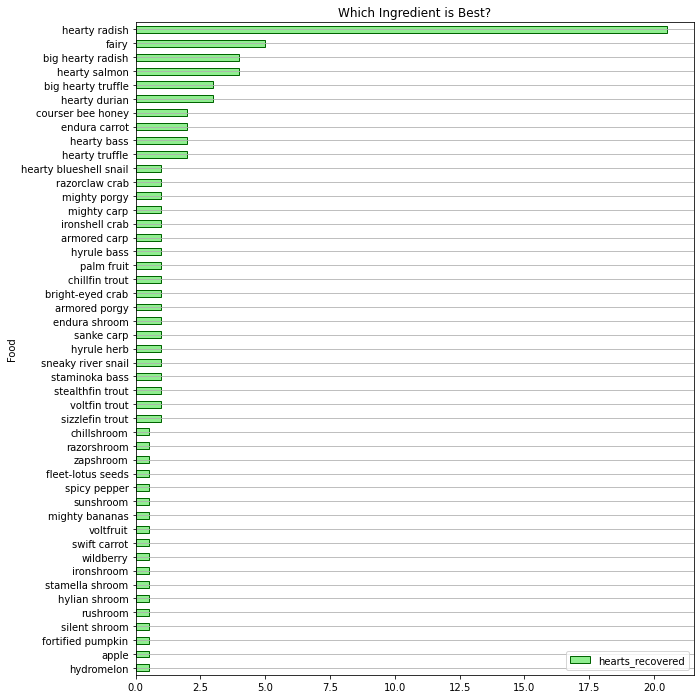

In [154]:
fig2, ax2 = plt.subplots()
hearts_df.plot(kind="barh", x="name", y ="hearts_recovered",figsize=(10,12), ax=ax2, edgecolor='darkgreen',color='lightgreen',
                  title="Which Ingredient is Best?",
                  xlabel="Food",
                  ylabel="Hearts Given");
ax2.yaxis.grid()
plt.savefig("../BotW/images/Ingredients.png")

## Cooked meals grant extra hearts and bonus effects

In [155]:
# Create DataFrame for cooking effects
cooking_df = pd.DataFrame(consumables_df)
# remove those that don't give a cooking effect
cooking_df

,name,hearts_recovered,cooking_effect
16,hearty radish,20.5,extra hearts
44,fairy,5.0,none
7,big hearty radish,4.0,extra hearts
49,hearty salmon,4.0,extra hearts
10,big hearty truffle,3.0,extra hearts
...,...,...,...
28,armoranth,0.0,defense up
38,bladed rhino beetle,0.0,attack up
1,mighty thistle,0.0,attack up
30,cool safflina,0.0,heat resistance


there are a total of 9 different types of consumales that give you extra hearts
this is good for survival and very beneficial for cooking!


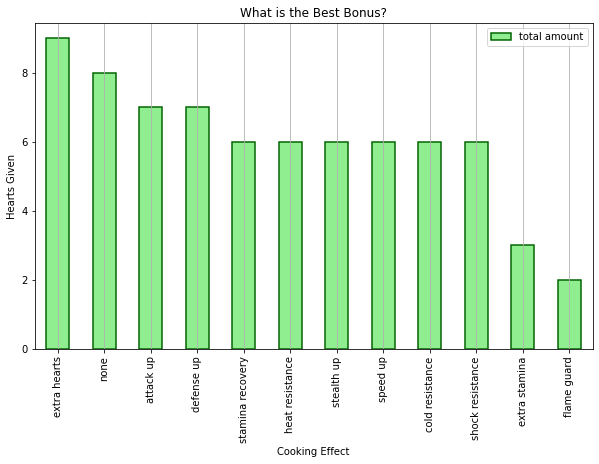

In [156]:
# Create a bar chart to capture the value counts of each cooking effect
fig4, ax4 = plt.subplots()
x = cooking_df['cooking_effect'].unique()
y = cooking_df['cooking_effect'].value_counts()
# create a new df to hold the value counts of each cooking effect
effect_count_df = pd.DataFrame({"cooking_effect":x, "total amount":y})
effect_count_df.plot(kind="bar",figsize=(10,6), ax=ax4, linewidth='1.5', edgecolor='darkgreen',color='lightgreen', 
                  title="What is the Best Bonus?",
                  xlabel="Cooking Effect",
                  ylabel="Hearts Given");
print(f"there are a total of {cooking_df['cooking_effect'].value_counts().max()} different types of consumales that give you extra hearts")
print("this is good for survival and very beneficial for cooking!")
ax4.xaxis.grid()
plt.savefig("../BotW/images/cooking_bonus.png")

In [157]:
#Call food data from second source
food_grid =("Food-Grid view.csv")
food_grid_df = pd.read_csv(food_grid)
#clear unecessary columns
Food_Grid_df=food_grid_df.drop(columns=['class', 'subclass', 'description', 'ingredients', 'effect']).dropna()
#Food_Grid_df

In [158]:
#Manipulate Data to suit our needs 
FoodGrid_df = Food_Grid_df[["hp", "name"]]
Food_Grid_df.reset_index(drop=True, inplace=True)
FoodGrid_df=FoodGrid_df.sort_values(by="hp", ascending=True)
FoodGrid_df=FoodGrid_df.set_index("name")
FoodGrid_df

,hp
name,
Roasted Armoranth,0.50
Roasted Acorn,0.50
Roasted Tree Nut,0.50
Roasted Mighty Thistle,0.50
Toasty Zapshroom,0.75
...,...
Seared Gourmet Steak,4.50
Roasted Whole Bird,4.50
Blueshell Escargot,4.50


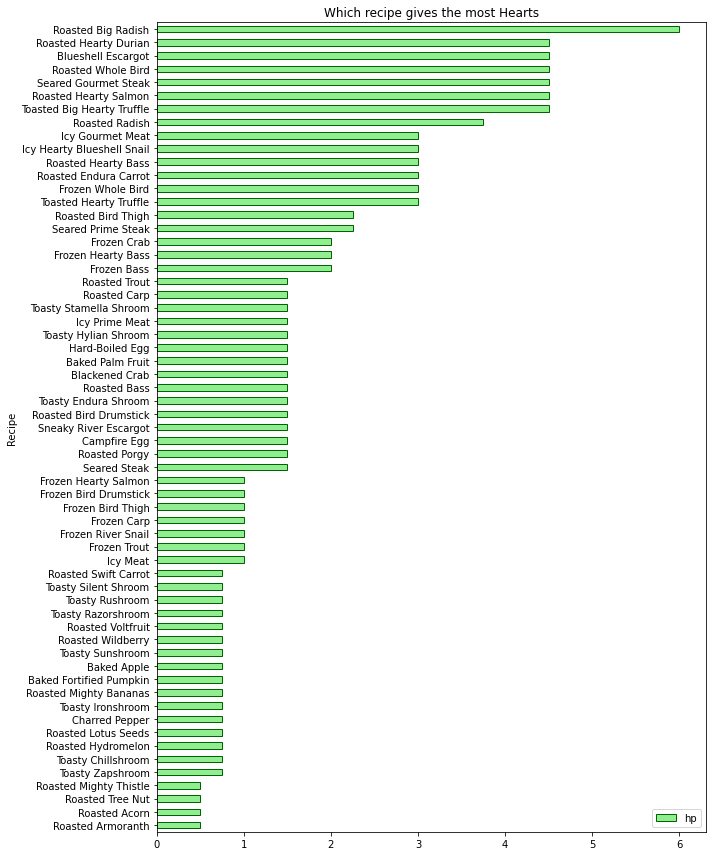

In [159]:
#Show info in graph form
fig, ax = plt.subplots()
FoodGrid_df.plot(kind="barh", figsize=(10,12), ax=ax, edgecolor='darkgreen',color='lightgreen',
                  title="Which recipe gives the most Hearts",
                  xlabel="Recipe",
                  ylabel="Hearts Gained");
fig.tight_layout();
plt.savefig("../BotW/images/Recipe_bar.png")

In [160]:
#Isolate Elixirs
Elixirs = food_grid_df[food_grid_df["name"].str.contains("Elixir")]
Elixirs=Elixirs.drop(columns=["class","hp"])
Elixirs
# save to .csv file
Elixirs.to_csv("Elixirs.csv", index=False)
Elixirs

,name,subclass,description,ingredients,effect
0,Tough Elixir,Elixir,"Grants a X-level toughness effect, which forti...",Rugged Rhino Beetle,Tough
1,Spicy Elixir,Elixir,"Warms your body from its core, increasing your...","Summerwing Butterfly,Warm Darner",Spicy
2,Sneaky Elixir,Elixir,"Grants a X-level stealth effect, which calms t...",Sunset Firefly,Sneaky
3,Mighty Elixir,Elixir,"Grants a might effect, which strengthens your ...","Bladed Rhino Beetle,Mighty Bananas,Monster Part",Mighty
4,Hearty Elixir,Elixir,Restores you to full health and increases your...,Hearty Lizard,Hearty
5,Hasty Elixir,Elixir,"Grants a X-level haste effect, which boosts yo...","Hightail Lizard,Hot-Footed Frog",Hasty
6,Fireproof Elixir,Elixir,"Grants a fireproof effect, which prevents your...","Fireproof Lizard,Smotherwing Butterfly",Fireproof
7,Energizing Elixir,Elixir,"Restores your Stamina, which is used when perf...","Restless Cricket,Energetic Rhino Beetle",Energizing
8,Enduring Elixir,Elixir,Restores stamina and temporarily extends your ...,Tireless Frog,Enduring
9,Electro Elixir,Elixir,Grants a X-level resistance to electricity. Us...,"Thunderwing Butterfly,Electric Darner",Electro


In [29]:
import dataframe_image as dfi
Elixirs_df = pd.DataFrame(Elixirs)
dfi.export(Elixirs_df, '../BotW/images/Elixirs.png')

## Let's get into the game details

## how many defense weapons are there and which is the best one?

In [38]:
# Bring equipment table
equipment_df = equipment_df.fillna(0).sort_values(by="defense", ascending=False)
equipment_df

,name,attack,defense
53,hylian shield,0.0,90.0
21,ancient shield,0.0,70.0
16,royal guard's shield,0.0,70.0
52,savage lynel shield,0.0,62.0
61,royal shield,0.0,55.0
...,...,...,...
153,great flameblade,34.0,0.0
108,great frostblade,30.0,0.0
46,great thunderblade,32.0,0.0
42,guardian spear,10.0,0.0


In [39]:
# create Defense Df for barchart
# set variables to hols name and defense
equipment = equipment_df["name"]
#convert floats to ints
defense = equipment_df["defense"].astype(int)
defense_bar_df = pd.DataFrame({"Equipment":equipment, "Defense":defense})
defense_bar_df = defense_bar_df[defense_bar_df['Defense'] !=0]
defense_bar_df = defense_bar_df.set_index("Equipment")

the shiled with the best defense is the Hylian Shield with 90 defense


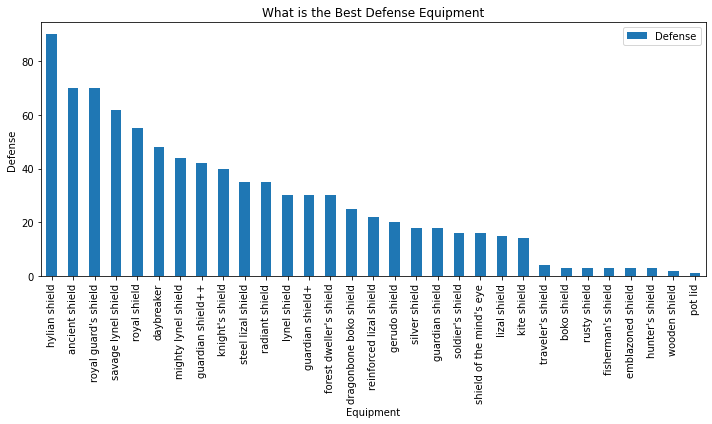

In [40]:
# plot bar chart from DataFrame
fig, ax = plt.subplots()
defense_bar_df.plot(kind="bar", figsize=(10,6), ax=ax, 
                  title="What is the Best Defense Equipment",
                  xlabel="Equipment",
                  ylabel="Defense");
fig.tight_layout();
plt.savefig("../BotW/images/defense_bar.png")
print(f"the shiled with the best defense is the Hylian Shield with {int(equipment_df['defense'].max())} defense")

## Let's armor up!

In [41]:
stuff = "Stuff-Grid view.csv"
stuff_file = pd.read_csv(stuff)
stuff_df = pd.DataFrame(stuff_file)
stuff_df.head()

,name,class,subclass,tags,durability,strength,range,arrows,defense,defense_upgrade_lvl1,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Remove unecessary columns
stuff_df = stuff_df.drop(columns=["tags", "durability", "strength", "range",
                    "arrows", "description", "selling_price","where_to_find","upgrade_1","upgrade_2","upgrade_3", 
                    "upgrade_4","armor_upgrade",
                    "where_to_find","notes"])
# stuff_df

In [43]:
armor_df = pd.DataFrame(stuff_df.loc[stuff_df["class"] == "Armor", :])

In [44]:
# Fills NaN's with 0 and Nones
armor_df['defense_upgrade_lvl4'] = armor_df['defense_upgrade_lvl4'].fillna(0)
armor_df[['bonus','bonus_set']] = armor_df[['bonus','bonus_set']].fillna("None")
armor_df = armor_df.set_index(["name"])

# CREATE TABLE FOCUSIN ON BONUS SETS

In [45]:
bonus_set_df = pd.DataFrame(armor_df.reset_index())

In [46]:
bonus_set_df = bonus_set_df.drop(columns=["class","bonus"])

In [47]:
# bonus_set_df.set_index("bonus_set")
bonus_set_df = bonus_set_df.sort_values(by="bonus_set")

In [48]:
bonus_set_df = bonus_set_df.groupby("bonus_set").sum()
bonus_set_df = bonus_set_df.drop(index="None")

In [49]:
bonus_set_df = bonus_set_df.sort_values(by="defense_upgrade_lvl4", ascending=False)

In [50]:
bonus_set_df

,defense,defense_upgrade_lvl1,defense_upgrade_lvl2,defense_upgrade_lvl3,defense_upgrade_lvl4
bonus_set,,,,,
Master Sword Beam,57.0,96.0,156.0,234.0,384.0
Charge Attack Stamina,18.0,27.0,48.0,72.0,120.0
Ancient Proficiency,12.0,21.0,36.0,54.0,84.0
Climb Stamina,9.0,15.0,24.0,36.0,60.0
Disguise and Bone Attack,9.0,15.0,24.0,36.0,60.0
Fireproof,9.0,15.0,24.0,36.0,60.0
Shock Resist,9.0,15.0,24.0,36.0,60.0
Swim Dash Stamina,9.0,15.0,24.0,36.0,60.0
Unfreezable,9.0,15.0,24.0,36.0,60.0


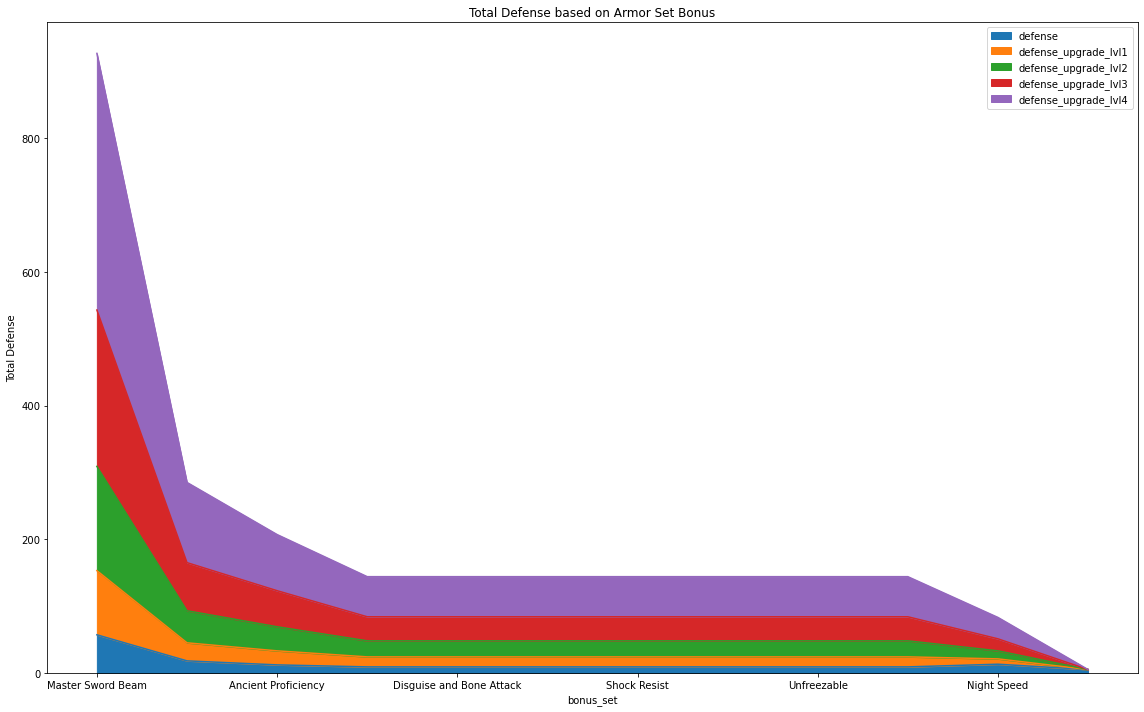

In [51]:
xticks= bonus_set_df.index.values
fig, ax =  plt.subplots()
bonus_set_df.plot(kind="area", ax=ax, figsize=(16,10));
ax.set(ylabel="Total Defense", title="Total Defense based on Armor Set Bonus");
fig.tight_layout();
plt.savefig("../BotW/images/armor_set_bonus.png")